## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [1]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [2]:
#!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
#!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [3]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
'''input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)'''

'input_layer = Input(shape=(n,))\nembedding = Embedding(no_1, no_2, input_length=n)(input_layer)\nflatten = Flatten()(embedding)'

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [4]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
'''import os
import pickle
import tensorflow
from tensorflow.keras.layers import Embedding, LSTM, Dropout, \
BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import he_normal
from tensorflow.python.keras.callbacks import TensorBoard
from keras import Model, Input
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import regex as re'''

'import os\nimport pickle\nimport tensorflow\nfrom tensorflow.keras.layers import Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU\nfrom tensorflow.keras import regularizers\nfrom tensorflow.keras.initializers import he_normal\nfrom tensorflow.python.keras.callbacks import TensorBoard\nfrom keras import Model, Input\nfrom keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler\nfrom sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer\nfrom sklearn.preprocessing import StandardScaler, LabelEncoder\nimport regex as re'

In [71]:
%load_ext tensorboard
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
from keras.layers import Input, Embedding, LSTM, Dropout, BatchNormalization, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from tensorflow.keras.initializers import he_normal
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import re
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle

In [6]:
os.chdir(r'C:\Users\Bazinga\AAIC\Assignments\Donors choose')

In [7]:
#read the csv file
import pandas as pd
df = pd.read_csv('project_data.csv')

In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'teacher_id', 'teacher_prefix',
       'school_state', 'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'quantity', 'std_price', 'nrm_price',
       'is_digit_project_resource_summary'],
      dtype='object')

In [9]:
data=df[['teacher_prefix', 'school_state', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved','is_digit_project_resource_summary', 'price', 'quantity', 'essay']].copy()

In [10]:
data.columns

Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'is_digit_project_resource_summary', 'price', 'quantity', 'essay'],
      dtype='object')

In [11]:
data

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,is_digit_project_resource_summary,price,quantity,essay
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,My students need opportunities to practice beg...,0,0,0,154.60,23,My students are English learners that are work...
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,My students need a projector to help with view...,7,1,0,299.00,1,Our students arrive to our school eager to lea...
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,"My students need shine guards, athletic socks,...",1,0,0,516.85,22,"\r\n\""True champions aren't always the ones th..."
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,My students need to engage in Reading and Math...,4,1,0,232.90,4,I work at a unique school filled with both ESL...
4,mrs,tx,grades_prek_2,math_science,mathematics,My students need hands on practice in mathemat...,1,1,0,67.98,4,Our second grade classroom next year will be m...
...,...,...,...,...,...,...,...,...,...,...,...,...
109243,mr,mo,grades_prek_2,literacy_language_math_science,literature_writing_mathematics,My students need these privacy partitions to h...,0,1,0,59.98,8,Welcome to Mr. Ramos's 2nd grade classroom! We...
109244,ms,nj,grades_prek_2,literacy_language_math_science,literacy_mathematics,My students need two iPad's and protective cas...,0,1,0,846.32,4,"Every morning, we start our day with our core ..."
109245,mrs,nj,grades_prek_2,literacy_language_math_science,literacy_mathematics,My students need giant comfy pillows in order ...,3,1,0,239.96,4,This is a great group of sharing and caring st...
109246,mrs,ny,grades_3_5,health_sports_specialneeds,health_wellness_specialneeds,My students need flexible seating options: bea...,0,1,0,73.05,16,Our students live in a small rural community. ...


In [12]:
# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['project_is_approved'], axis=1), data['project_is_approved'], test_size=0.30, random_state=1, stratify=df['project_is_approved'])

In [13]:
len(x_train)

76473

In [14]:
len(x_test)

32775

In [15]:
y_train.shape

(76473,)

In [16]:
y_test.shape

(32775,)

## 1.1 Text Vectorization

In [17]:
#let's get all unique words present in essay text using idf values
tfidfVector=TfidfVectorizer()

tfidfVector.fit_transform(x_train['essay'])
train_essay_idf=tfidfVector.idf_
train_essay_vocab=tfidfVector.vocabulary_

In [18]:
len(train_essay_idf)

52776

In [19]:
len(train_essay_vocab)

52776

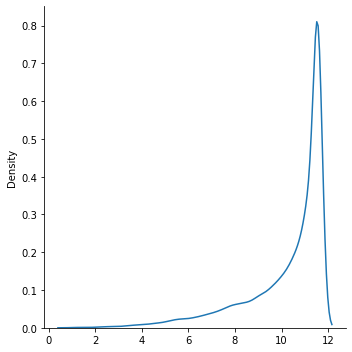

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(train_essay_idf, kind='kde')
plt.show()

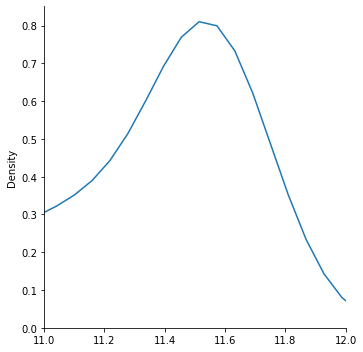

In [21]:
sns.displot(train_essay_idf, kind='kde')
plt.xlim(11,12)
plt.show()

#### Let's consider only the words whose idf >6

In [22]:
train_essay_idf_vocab=dict(list(zip( train_essay_vocab, train_essay_idf)))

In [23]:
len(train_essay_idf_vocab)

52776

In [24]:
# words with idf > 6
train_essay_idf_vocab=dict([(k,v) for k,v in train_essay_idf_vocab.items() if v>6.0 if v<11.8])

In [25]:
len(train_essay_idf_vocab)

50527

In [26]:
train_essay_idf_vocab.get('book')

11.551558912204982

In [27]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize our training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_essay_idf_vocab.keys())


# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(x_train['essay'])
test_sequences = tokenizer.texts_to_sequences(x_test['essay'])

#word index
word_index = tokenizer.word_index


In [28]:
len(word_index)

50509

In [29]:
#index for word 'book' in word_index
word_index.get('book')

155

In [30]:
#Pad the training sequences
train_padded_docs = pad_sequences(train_sequences, maxlen=200)
test_padded_docs = pad_sequences(test_sequences, maxlen=200)


In [31]:
#print(train_padded_docs[0])
print("Padded training shape:", train_padded_docs.shape)
print("Padded training shape:", test_padded_docs.shape)

Padded training shape: (76473, 200)
Padded training shape: (32775, 200)


In [32]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

filename=r'C:\Users\Bazinga\AAIC\Assignments\Donors choose\glove_vectors'
with open(filename, 'rb') as f:
    glove_vectors = pickle.load(f)
          
len(glove_vectors)

51510

In [33]:
#vector for word 'book' in
glove_vectors.get('book')

array([ 3.8601e-01, -3.0722e-02,  1.0253e-02, -7.4123e-03, -3.6596e-01,
        5.5008e-01, -2.8315e+00,  1.3928e-01, -3.8478e-01, -1.8240e-01,
       -1.1115e-01, -1.5533e-01,  3.2932e-01,  1.2650e-01,  1.4454e-01,
        1.7744e-01, -1.3911e-01, -6.6150e-02,  2.6200e-01,  1.2449e-01,
        1.1151e-01, -1.0464e-02, -3.7677e-01,  3.4683e-02, -3.2079e-01,
       -3.2604e-01, -3.3666e-01,  2.7382e-01, -2.4268e-01, -2.1725e-01,
        9.1897e-01, -6.4498e-01,  5.4469e-01,  1.8540e-01,  2.7719e-01,
        3.6023e-01,  2.0500e-01, -4.7606e-01, -1.1422e-01,  3.4933e-01,
       -4.6246e-01, -9.4401e-02, -7.7117e-01, -2.4260e-01, -4.4962e-02,
        6.2085e-02, -1.0465e-01,  2.2715e-01, -5.2959e-01,  9.6466e-02,
        1.0507e-01, -2.1318e-01, -3.6708e-02,  3.3726e-02, -4.1630e-01,
        9.9894e-02,  5.8242e-01,  1.9571e-01,  1.9870e-01,  3.5501e-01,
       -8.9476e-02, -2.0641e-01,  4.5121e-01,  3.3548e-01,  3.2789e-02,
        3.9188e-01,  6.8119e-01,  4.0375e-01,  3.6739e-02, -1.35

In [34]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#https://www.geeksforgeeks.org/pre-trained-word-embedding-using-glove-in-nlp-models/
import numpy as np
embed_matrix=np.zeros((len(word_index)+1, 300))
for word, index in word_index.items():
    if glove_vectors.get(word) is not None:
        embed_matrix[index]=glove_vectors.get(word)
        

In [35]:
embed_matrix.shape

(50510, 300)

In [36]:
#vector for word 'book' in embed_matrix
embed_matrix[155]

array([ 3.8601e-01, -3.0722e-02,  1.0253e-02, -7.4123e-03, -3.6596e-01,
        5.5008e-01, -2.8315e+00,  1.3928e-01, -3.8478e-01, -1.8240e-01,
       -1.1115e-01, -1.5533e-01,  3.2932e-01,  1.2650e-01,  1.4454e-01,
        1.7744e-01, -1.3911e-01, -6.6150e-02,  2.6200e-01,  1.2449e-01,
        1.1151e-01, -1.0464e-02, -3.7677e-01,  3.4683e-02, -3.2079e-01,
       -3.2604e-01, -3.3666e-01,  2.7382e-01, -2.4268e-01, -2.1725e-01,
        9.1897e-01, -6.4498e-01,  5.4469e-01,  1.8540e-01,  2.7719e-01,
        3.6023e-01,  2.0500e-01, -4.7606e-01, -1.1422e-01,  3.4933e-01,
       -4.6246e-01, -9.4401e-02, -7.7117e-01, -2.4260e-01, -4.4962e-02,
        6.2085e-02, -1.0465e-01,  2.2715e-01, -5.2959e-01,  9.6466e-02,
        1.0507e-01, -2.1318e-01, -3.6708e-02,  3.3726e-02, -4.1630e-01,
        9.9894e-02,  5.8242e-01,  1.9571e-01,  1.9870e-01,  3.5501e-01,
       -8.9476e-02, -2.0641e-01,  4.5121e-01,  3.3548e-01,  3.2789e-02,
        3.9188e-01,  6.8119e-01,  4.0375e-01,  3.6739e-02, -1.35

## 1.2 Categorical feature Vectorization

In [37]:
x_train.head(2)

,teacher_prefix,school_state,project_grade_category,project_subject_categories,project_subject_subcategories,project_resource_summary,teacher_number_of_previously_posted_projects,is_digit_project_resource_summary,price,quantity,essay
67032,mrs,id,grades_prek_2,literacy_language,literacy,My students need book bins to hold our classro...,1,0,4.21,25,Next year I will be moving to 1st grade and te...
103426,mrs,wa,grades_prek_2,literacy_language,literature_writing,My students need headphones to minimize the no...,1,0,75.12,20,My second grade classroom is made up of 23 stu...


In [38]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.
labelEncoder=LabelEncoder()
labelEncoder.fit(x_train["teacher_prefix"])

train_teacher_prefix = labelEncoder.fit_transform(x_train["teacher_prefix"])
test_teacher_prefix = labelEncoder.transform(x_test["teacher_prefix"])

In [39]:
x_train["teacher_prefix"].nunique()

5

In [40]:
train_teacher_prefix[0]

2

In [41]:
labelEncoder.fit(x_train["school_state"])

train_school_state = labelEncoder.fit_transform(x_train["school_state"])
test_school_state = labelEncoder.transform(x_test["school_state"])

In [42]:
x_train["school_state"].nunique()

51

In [43]:
train_school_state

array([13, 47, 25, ..., 22, 34, 36])

In [44]:
labelEncoder.fit(x_train["project_grade_category"])

train_project_grade_category= labelEncoder.fit_transform(x_train["project_grade_category"])
test_project_grade_category= labelEncoder.transform(x_test["project_grade_category"])

In [45]:
x_train["project_grade_category"].nunique()

4

In [46]:
train_project_grade_category

array([3, 3, 0, ..., 0, 3, 2])

In [47]:
labelEncoder.fit(x_train["project_subject_categories"])

x_test["project_subject_categories"] = x_test["project_subject_categories"]\
                            .map(lambda cls: '<absent>' if cls not in labelEncoder.classes_ else cls)
labelEncoder.classes_ = np.append(labelEncoder.classes_, '<absent>')
train_project_subject_categories= labelEncoder.transform(x_train["project_subject_categories"])
test_project_subject_categories= labelEncoder.transform(x_test["project_subject_categories"])

In [48]:
x_train["project_subject_categories"].nunique()

51

In [49]:
train_project_subject_categories

array([24, 24, 32, ..., 32, 28,  2])

In [50]:
labelEncoder.fit(x_train["project_subject_subcategories"])

#labelEncoder.fit(x_train["project_subject_categories"])

x_test["project_subject_subcategories"] = x_test["project_subject_subcategories"]\
                            .map(lambda cls: '<absent>' if cls not in labelEncoder.classes_ else cls)
labelEncoder.classes_ = np.append(labelEncoder.classes_, '<absent>')
train_project_subject_subcategories= labelEncoder.transform(x_train["project_subject_subcategories"])
test_project_subject_subcategories= labelEncoder.transform(x_test["project_subject_subcategories"])

In [51]:
x_train["project_subject_subcategories"].nunique()

392

In [52]:
train_project_subject_subcategories

array([308, 321, 333, ...,  18, 310,  52])

## 1.3 Numerical feature Vectorization

In [53]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test


In [54]:
def reshape_df(df):
    return df.values.reshape(-1,1)

In [55]:
#reshaping numerical df so as to make them available for StandarScalar()
train_teacher_number_of_previously_posted_projects=reshape_df(x_train['teacher_number_of_previously_posted_projects'])
test_teacher_number_of_previously_posted_projects=reshape_df(x_test['teacher_number_of_previously_posted_projects'])

train_price=reshape_df(x_train['price'])
test_price=reshape_df(x_test['price'])

train_quantity=reshape_df(x_train['quantity'])
test_quantity=reshape_df(x_test['quantity'])

train_is_digit_project_resource_summary=reshape_df(x_train['is_digit_project_resource_summary'])
test_is_digit_project_resource_summary=reshape_df(x_test['is_digit_project_resource_summary'])

In [56]:
train_numeric_data=np.concatenate((train_teacher_number_of_previously_posted_projects,train_price,\
                                  train_quantity,train_is_digit_project_resource_summary), axis=1)
test_numeric_data=np.concatenate((test_teacher_number_of_previously_posted_projects,test_price,\
                                 test_quantity,test_is_digit_project_resource_summary), axis=1)

In [57]:
train_numeric_data.shape

(76473, 4)

In [58]:
train_stdScalar=StandardScaler()
test_stdScalar=StandardScaler()

numerical_data_train=train_stdScalar.fit_transform(train_numeric_data)
numerical_data_test=train_stdScalar.transform(test_numeric_data)

In [59]:
numerical_data_train.shape

(76473, 4)

In [60]:
numerical_data_train

array([[-0.36479254, -0.80889284,  0.30528148, -0.41067111],
       [-0.36479254, -0.61354187,  0.11504245, -0.41067111],
       [-0.32895815, -0.02167607, -0.49372241, -0.41067111],
       ...,
       [ 0.02938566, -0.50105871, -0.26543559,  2.43503857],
       [ 2.68112992, -0.38171582, -0.41762681, -0.41067111],
       [-0.40062692, -0.60472614,  3.04472338, -0.41067111]])

## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [61]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [62]:
#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
v = ["teacher_prefix","school_state","project_grade_category","project_subject_categories","project_subject_subcategories"]
sizes = {}
embedSizes = {}
for i in v:
    sizes[i] = x_train[i].nunique()
    embedSizes[i] = min(50, sizes[i]//2+1) 

In [63]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# choosing embed size for categorical values- (total dimension//2)+1
#https://towardsdatascience.com/deep-learning-personal-notes-part-1-lesson-4-structured-learning-natural-language-processing-26188d744ece#:~:text=The%20rule%20of%20thumb%20for,but%20no%20bigger%20than%2050.

input_ = Input(shape=(200,), name="input_text")
e=Embedding(input_dim=len(word_index)+1,output_dim=300, weights=[embed_matrix],input_length=200,\
            trainable=False)(input_)
e=LSTM(128, dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.0001))(e)
flatten = Flatten()(e)

input_dim=len(x_train)+1
input1 = Input(shape=(1,))
e1 = Embedding(input_dim=input_dim, output_dim=embedSizes['teacher_prefix'])(input1)
flatten_1 = Flatten()(e1)

input2 = Input(shape=(1,))
e2 = Embedding(input_dim=input_dim, output_dim=embedSizes['school_state'])(input2)
flatten_2 = Flatten()(e2)


input3 = Input(shape=(1,))
e3 = Embedding(input_dim=input_dim, output_dim=embedSizes['project_grade_category'])(input3)
flatten_3 = Flatten()(e3)

input4 = Input(shape=(1,))
e4 = Embedding(input_dim=input_dim, output_dim=embedSizes['project_subject_categories'])(input4)
flatten_4 = Flatten()(e4)


input5 = Input(shape=(1,))
e5 = Embedding(input_dim=input_dim, output_dim=embedSizes['project_subject_subcategories'])(input5)
flatten_5 = Flatten()(e5)

#numerical_data_train
input6 = Input(shape=(4,))

e6 = Dense(32,kernel_initializer=he_normal(),kernel_regularizer=regularizers.l2(0.0001))(input6)
dense_for_rem_input = LeakyReLU()(e6)

final_input=concatenate([flatten, flatten_1, flatten_2, flatten_3, flatten_4, flatten_5, dense_for_rem_input])


x = Dense(256,activation='LeakyReLU',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.0001))(final_input)
x = Dropout(0.2)(x)
x = Dense(128,activation='LeakyReLU',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(48,activation='LeakyReLU',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.2)(x)
x = Dense(16,activation='LeakyReLU',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.0001))(x)

output = Dense(2, activation = 'softmax')(x)

model1=Model(inputs=[input_, input1, input2, input3, input4, input5, input6], \
             outputs=[output],name='model1' )


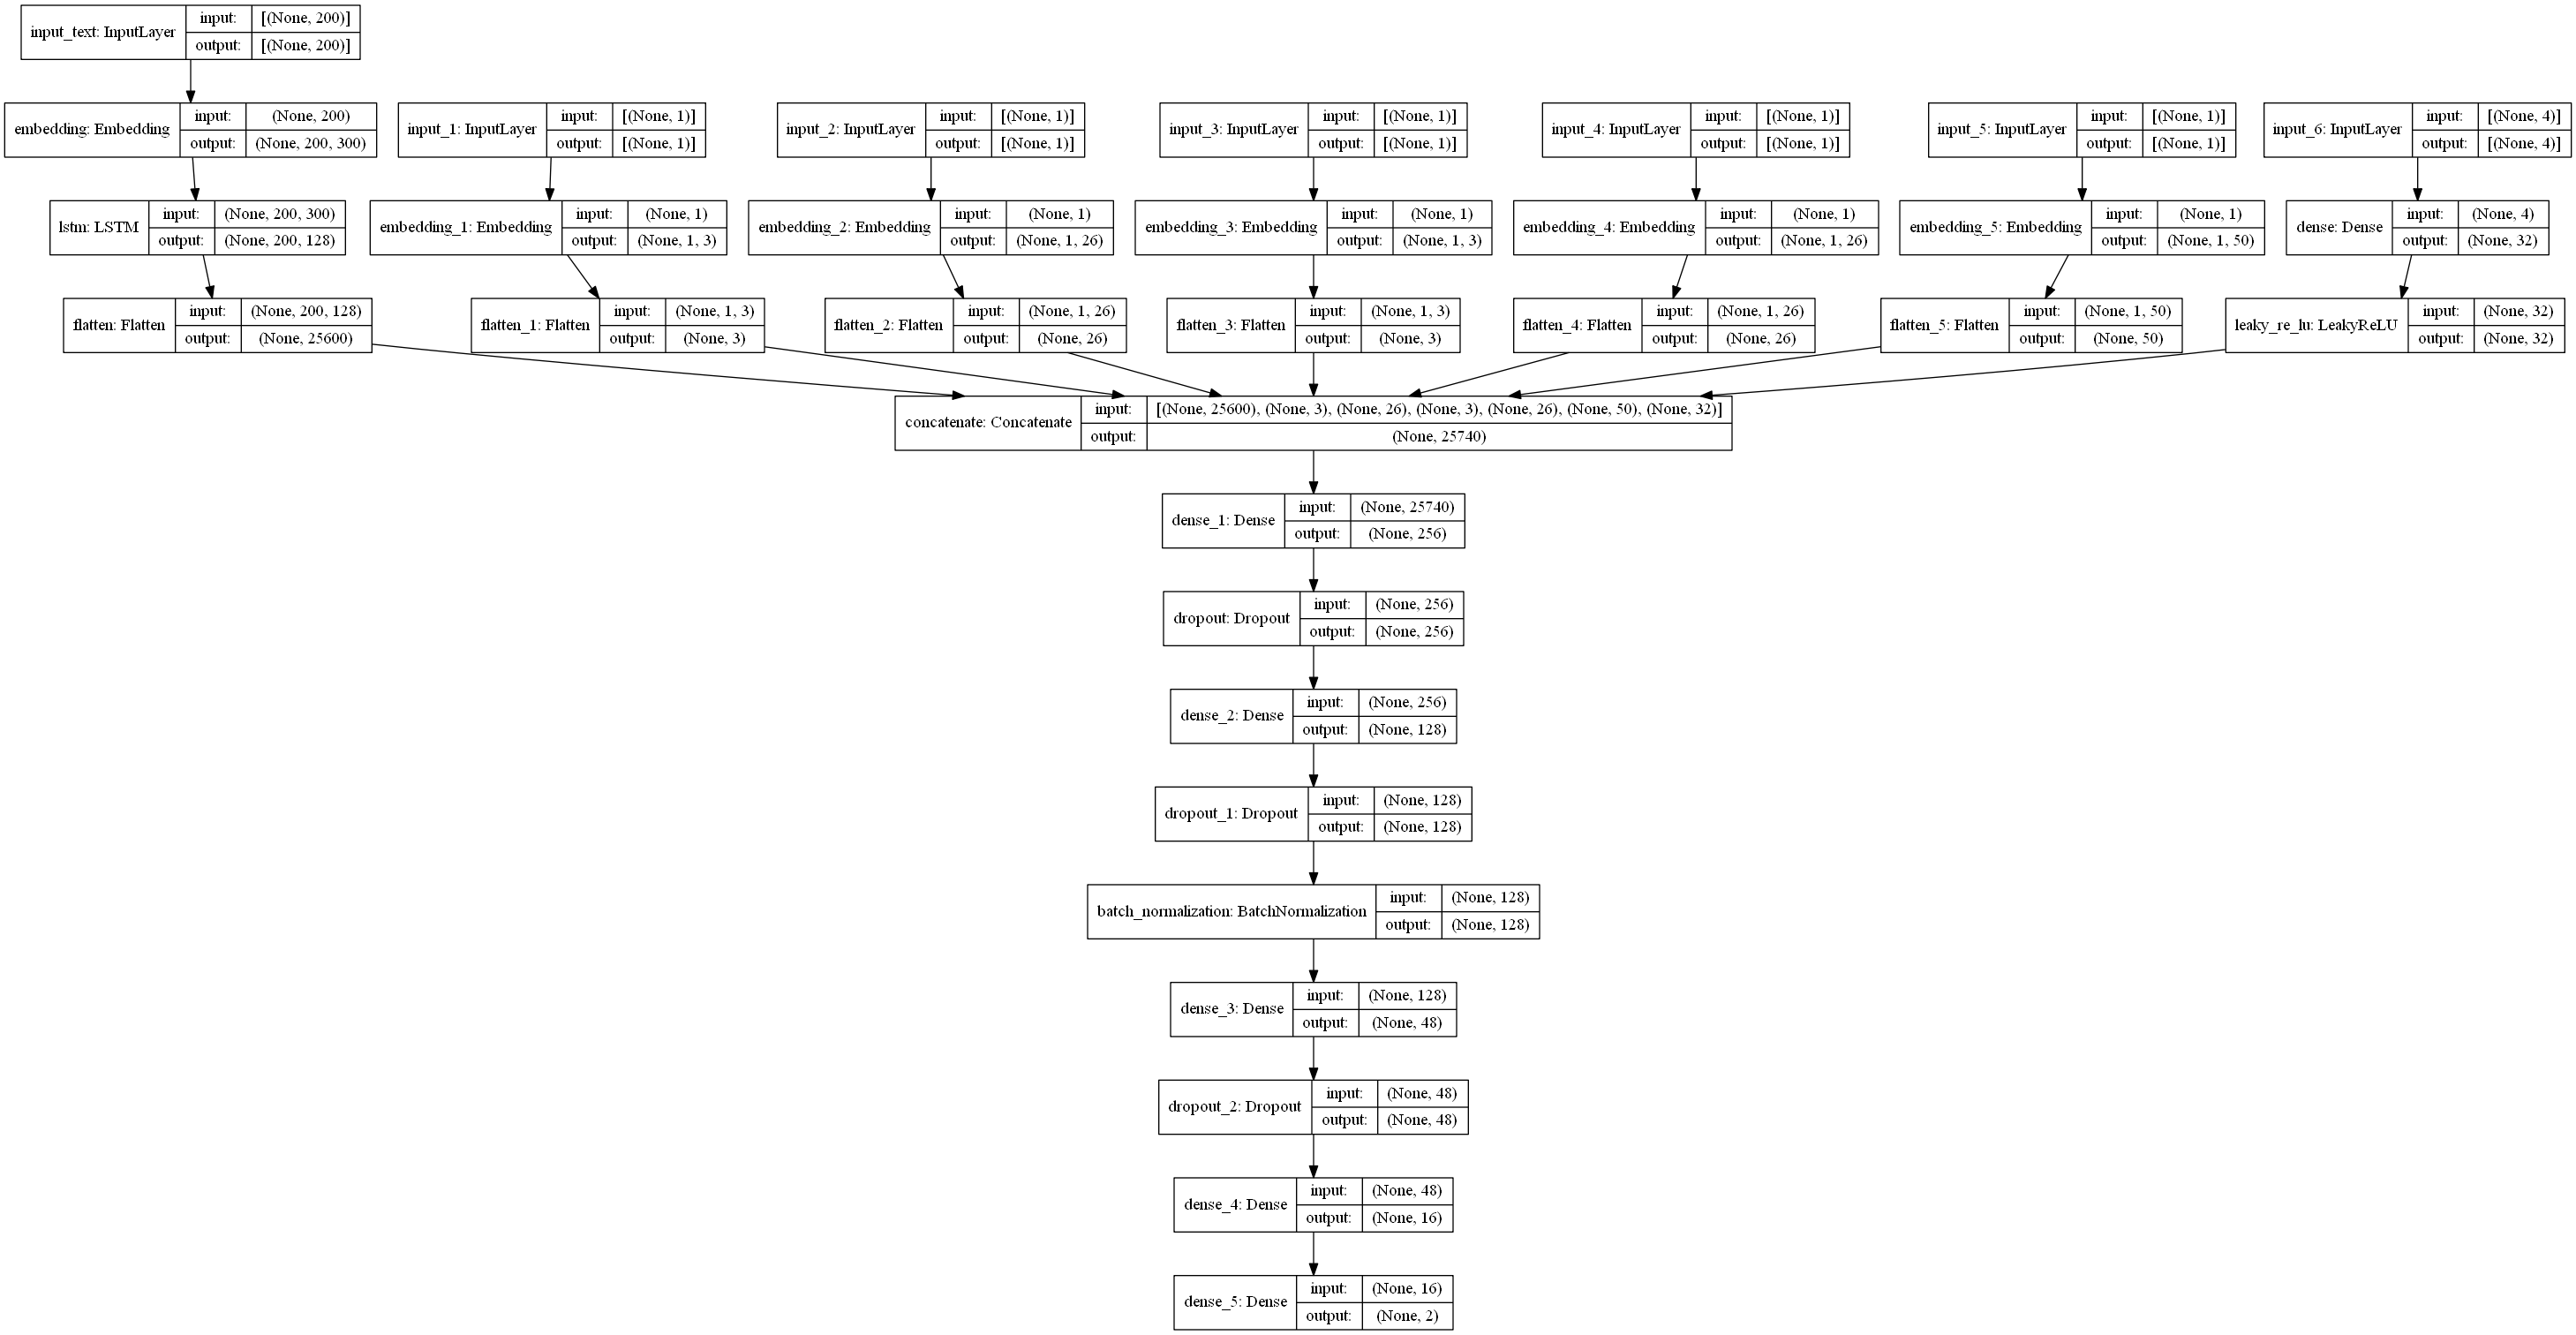

In [64]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)

## 1.5 Compiling and fititng your model

In [65]:
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
#https://stackoverflow.com/questions/57574501/how-to-use-sklearn-auc-in-tensorflow-keras-model-metrics

from sklearn.metrics import roc_auc_score

def aucroc(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def custom_auc_roc(y_true, y_pred):
    return tf.py_function(aucroc, (y_true, y_pred), tf.double)

In [66]:
log_dir="tensor_logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint_model1 = ModelCheckpoint("model1.h5", monitor='val_auc', verbose=2, save_best_only=True, mode='max')
earlystopping_model1 = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
tensorboard_model1 = TensorBoard(log_dir=log_dir)
reduce_lr_model1 = ReduceLROnPlateau(monitor ='val_loss', verbose=1)
callbacks_model1 = [checkpoint_model1, tensorboard_model1, earlystopping_model1, reduce_lr_model1]

In [67]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model
model1.run_eagerly = True
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),\
               metrics=[custom_auc_roc])

In [68]:
from keras.utils import np_utils
from scipy.sparse import hstack
y_train = np_utils.to_categorical(y_train, 2) 
y_test = np_utils.to_categorical(y_test, 2)

train_model1=[train_padded_docs, train_teacher_prefix, train_school_state,\
              train_project_grade_category,train_project_subject_categories,\
              train_project_subject_subcategories, numerical_data_train]
test_model1=[test_padded_docs, test_teacher_prefix, test_school_state,\
             test_project_grade_category,test_project_subject_categories,\
             test_project_subject_subcategories, numerical_data_test]

In [69]:
history1 = model1.fit(train_model1, y_train,batch_size=512,
                        epochs=20,validation_data=(test_model1, y_test),callbacks=callbacks_model1,\
                      verbose=1)

Epoch 1/20
150/150 [==============================] - 467s 3s/step - loss: 0.6623 - custom_auc_roc: 0.5705 - val_loss: 0.5266 - val_custom_auc_roc: 0.7061
Epoch 2/20
150/150 [==============================] - 498s 3s/step - loss: 0.5163 - custom_auc_roc: 0.6820 - val_loss: 0.5198 - val_custom_auc_roc: 0.7355
Epoch 3/20
150/150 [==============================] - 504s 3s/step - loss: 0.4790 - custom_auc_roc: 0.7246 - val_loss: 0.5153 - val_custom_auc_roc: 0.7465
Epoch 4/20
150/150 [==============================] - 512s 3s/step - loss: 0.4572 - custom_auc_roc: 0.7456 - val_loss: 0.4483 - val_custom_auc_roc: 0.7551
Epoch 5/20
150/150 [==============================] - 504s 3s/step - loss: 0.4448 - custom_auc_roc: 0.7622 - val_loss: 0.4465 - val_custom_auc_roc: 0.7558
Epoch 6/20
150/150 [==============================] - 495s 3s/step - loss: 0.4370 - custom_auc_roc: 0.7771 - val_loss: 0.4531 - val_custom_auc_roc: 0.7538
Epoch 7/20
150/150 [==============================] - 485s 3s/step - l

In [74]:
%tensorboard --logdir tensor_logs

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.